In [137]:
################### Initials: Self-oscillatory  ######
import BondGraphTools as bgt
import pprint
from math import exp,pow 
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import winsound


R=8.314; T=310; F= 96485;  q_m= -13300;  C_m= 153400

# Na channel initial conditions
x_Nai= 380 
x_Nae= 2127  
x_S00_Na = 2.2033e-6 
x_S30_Na = 0.01507e-7
x_S01_Na = 0.0737e-7
x_S31_Na = 0.8341e-8
K_Nai= 0.2   
K_Nae= 0.5
kappa_Na = 1000
z_Na=1 
K_00_Na = 10.3073376  
K_30_Na = 1000
K_01_Na = 300   
K_31_Na = 2000
kappa_m200 = 100   
kappa_h000 =0.01  
kappa_h300 = 0.012
kappa_m210 =0.01    
z_fm= 2  
z_rm= -0.5 
z_fh = -3 
z_rh = 1.2995



# Ca channel initial conditions
x_Cae =1112.4337  
x_Cai = 6.7562  
x_S000_LCC = 3.6989e-06
x_S021_LCC = 4.1099e-07
x_S101_LCC = 3.7363e-07
x_S121_LCC = 4.1514e-8
K_Cae = 1
K_Cai = 1 
z_Ca = 0.5 
kappa_Ca = 650 #550.2 #(normal AP)   650 (AP with EADs)
K_000_Ca =  5.3174  
K_021_Ca = 100   
K_101_Ca = 20.26  
K_121_Ca = 20.7502 
kappa_d1 =  50     
kappa_d2 = 20  
kappa_f1 = 20.5  
kappa_f2 = 400 
zf_d=  2.14  
zr_d= -2.1404 

zf_f= -1.1495   
zr_f= 1.8993

# K channel initial conditions
x_Ki= 5510 ; x_Ke= 27 
K_ki= 0.0102  
K_ke=0.059344
z_k=1
x_S00_K= 4.5648e-06
x_S01_K= 1.1412e-06
x_S10_K= 2.2824e-06
x_S11_K= 5.706e-07
x_S20_K= 2.853e-07
x_S21_K= 7.1325e-08
kappa_GHK_K = 90000 
K_00_K = 128.6868
K_01_K = 22.3033
K_10_K = 16.5777
K_11_K = 2.8732
K_20_K= 8.5423
K_21_K= 1.4805

kappa_X00= 10.034684
kappa_X01= 0.20012
kappa_X10= 0.13462
kappa_X11= 0.77675
kappa_i00= 7.7389
kappa_i10= 60.0742
kappa_i20= 116.5836

z_fX= 0.51923 
z_rX= -0.73169
z_fXi= 0
z_rXi= 0.83216

In [138]:
# Membrane components (self_oscilatory)
model=bgt.new(name="APmodel")
zero_F = bgt.new("0")
TF_F=bgt.new("TF", value=F, name="F")
C_mem=bgt.new("C", name="C_m", value=C_m)
zero_mem=bgt.new("0")

# Stimulus
Sf=bgt.new("Sf", value=None, name="I_Stim")
one_stim=bgt.new("1")

# Membrane connections
bgt.add(model,C_mem,zero_F,TF_F,zero_mem,Sf,one_stim)
bgt.connect((TF_F,1),zero_F)
bgt.connect(zero_mem,(TF_F,0))
bgt.connect(one_stim,Sf)
bgt.connect(zero_mem,C_mem)
bgt.connect(zero_mem,one_stim)



# Channel Na Module components

Ce_Nai = bgt.new("Ce_S", name="Na_i", library="BioChem", value={'k':K_Nai , 'R':R, 'T':T})
Ce_Nae= bgt.new("Ce_S", name="Na_e", library="BioChem", value={'k':K_Nae, 'R':R, 'T':T})
zero_Nai = bgt.new("0")
zero_Nae = bgt.new("0")
zero_mod_Na = bgt.new("0")
one_Nai=bgt.new("1")
one_Nae=bgt.new("1")
Re_GHK_Na= bgt.new("Re", library="BioChem", value={'r':kappa_Na, 'R':R, 'T':T, 'name':'Na Channel'})
TF_zNa=bgt.new("TF", value=z_Na, name="z_{Na}")


# Na Modulation components

S00_Na = bgt.new("Ce", name="S00_Na", library="BioChem", value={'k':K_00_Na , 'R':R, 'T':T})
S30_Na = bgt.new("Ce", name="S30_Na", library="BioChem", value={'k':K_30_Na , 'R':R, 'T':T})
S01_Na = bgt.new("Ce", name="S01_Na", library="BioChem", value={'k':K_01_Na , 'R':R, 'T':T})
S31_Na = bgt.new("Ce", name="S31_Na", library="BioChem", value={'k':K_31_Na , 'R':R, 'T':T})
zero_S00_Na = bgt.new("0")
zero_S30_Na = bgt.new("0")
zero_S01_Na = bgt.new("0")
zero_S31_Na = bgt.new("0")
one_Re_m_forward=bgt.new("1")
one_Re_m_reverse=bgt.new("1")
one_Re_mh_forward=bgt.new("1")
one_Re_mh_reverse=bgt.new("1")
one_Re_hm_forward=bgt.new("1")
one_Re_hm_reverse=bgt.new("1")
one_Re_h_forward=bgt.new("1")
one_Re_h_reverse=bgt.new("1")
Re_m = bgt.new("Re", library="BioChem", value={'r':kappa_m200, 'R':R, 'T':T, 'name':'Re_m'})
Re_mh = bgt.new("Re", library="BioChem", value={'r':kappa_h300, 'R':R, 'T':T, 'name':'Re_mh'})
Re_hm = bgt.new("Re", library="BioChem", value={'r':kappa_m210, 'R':R, 'T':T, 'name':'Re_hm'})
Re_h = bgt.new("Re", library="BioChem", value={'r':kappa_h000, 'R':R, 'T':T, 'name':'Re_h'})
TF_fm1=bgt.new("TF", value=z_fm, name="z_{fm1}")
TF_rm1=bgt.new("TF", value=z_rm, name="z_{rm1}")
TF_fm2=bgt.new("TF", value=z_fm, name="z_{fm2}")
TF_rm2=bgt.new("TF", value=z_rm, name="z_{rm2}")
TF_fh1=bgt.new("TF", value=z_fh, name="z_{fh1}")
TF_rh1=bgt.new("TF", value=z_rh, name="z_{rh1}")
TF_fh2=bgt.new("TF", value=z_fh, name="z_{fh2}")
TF_rh2=bgt.new("TF", value=z_rh, name="z_{rh2}")
zero_m = bgt.new("0")
zero_h = bgt.new("0")
zero_mh = bgt.new("0")
zero_hm = bgt.new("0")
zero_fv_Na = bgt.new("0")

bgt.add(model,Ce_Nai,Ce_Nae,zero_Nai,zero_Nae,zero_mod_Na,one_Nai,one_Nae,Re_GHK_Na,TF_zNa,S00_Na,S30_Na,S01_Na,
S31_Na,zero_S00_Na,zero_S30_Na,zero_S01_Na,zero_S31_Na,one_Re_m_forward,one_Re_m_reverse,one_Re_mh_forward,
one_Re_mh_reverse,one_Re_hm_forward,one_Re_hm_reverse,one_Re_h_forward,one_Re_h_reverse,Re_m,Re_mh,Re_hm,
Re_h,TF_fm1,TF_rm1,TF_fm2,TF_rm2,TF_fh1,TF_rh1,TF_fh2,TF_rh2,zero_m,zero_h,zero_mh,zero_hm,zero_fv_Na)

# Channel Na Module Connections

bgt.connect(one_Nae,Re_GHK_Na)
bgt.connect(Re_GHK_Na,one_Nai)
bgt.connect(zero_mod_Na,one_Nae)
bgt.connect(one_Nai,zero_mod_Na)
bgt.connect(one_Nai,zero_Nai)
bgt.connect(zero_Nae,one_Nae)
bgt.connect(zero_Nae,Ce_Nae)
bgt.connect(zero_Nai,Ce_Nai)
bgt.connect(one_Nai,(TF_zNa,0))

# Gating connections

# Re: m
bgt.connect(zero_S00_Na,S00_Na)
bgt.connect(zero_S00_Na,one_Re_m_forward)
bgt.connect(one_Re_m_forward,Re_m)
bgt.connect(Re_m,one_Re_m_reverse)
bgt.connect(one_Re_m_reverse,zero_S30_Na)
bgt.connect(zero_S30_Na,S30_Na)
bgt.connect(one_Re_m_reverse,(TF_rm1,0))
bgt.connect((TF_rm1,1),zero_m)
bgt.connect(zero_m,(TF_fm1,0))
bgt.connect((TF_fm1,1),one_Re_m_forward)

# Re: h
bgt.connect(zero_S00_Na,one_Re_h_forward)
bgt.connect(one_Re_h_forward,Re_h)
bgt.connect(Re_h,one_Re_h_reverse)
bgt.connect(one_Re_h_reverse,zero_S01_Na)
bgt.connect(zero_S01_Na,S01_Na)
bgt.connect(one_Re_h_reverse,(TF_rh1,0))
bgt.connect((TF_rh1,1),zero_h)
bgt.connect(zero_h,(TF_fh1,0))
bgt.connect((TF_fh1,1),one_Re_h_forward)


# Re: hm
bgt.connect(zero_S01_Na,one_Re_hm_forward)
bgt.connect(one_Re_hm_forward,Re_hm)
bgt.connect(Re_hm,one_Re_hm_reverse)
bgt.connect(one_Re_hm_reverse,zero_S31_Na)
bgt.connect(zero_S31_Na,S31_Na)
bgt.connect(one_Re_hm_reverse,(TF_rm2,0))
bgt.connect((TF_rm2,1),zero_hm)
bgt.connect(zero_hm,(TF_fm2,0))
bgt.connect((TF_fm2,1),one_Re_hm_forward)

# Re: mh
bgt.connect(zero_S30_Na,one_Re_mh_forward)
bgt.connect(one_Re_mh_forward,Re_mh)
bgt.connect(Re_mh,one_Re_mh_reverse)
bgt.connect(one_Re_mh_reverse,zero_S31_Na)
bgt.connect(one_Re_mh_reverse,(TF_rh2,0))
bgt.connect((TF_rh2,1),zero_mh)
bgt.connect(zero_mh,(TF_fh2,0))
bgt.connect((TF_fh2,1),one_Re_mh_forward)

#Other connections
bgt.connect(zero_S31_Na,zero_mod_Na)
bgt.connect(zero_fv_Na,zero_m)
bgt.connect(zero_fv_Na,zero_h)
bgt.connect(zero_fv_Na,zero_mh)
bgt.connect(zero_fv_Na,zero_hm)
bgt.connect(zero_F,zero_fv_Na)
bgt.connect((TF_zNa,1),zero_F)

# Channel Ca Module components

Ce_Cai = bgt.new("Ce_S", name="Ca_i", library="BioChem", value={'k':K_Cai , 'R':R, 'T':T})
Ce_Cae= bgt.new("Ce_S", name="Ca_e", library="BioChem", value={'k':K_Cae, 'R':R, 'T':T})
zero_Cai = bgt.new("0")
zero_Cae = bgt.new("0")
zero_mod_Ca = bgt.new("0")
one_Cai=bgt.new("1")
one_Cae=bgt.new("1")
Re_GHK_Ca= bgt.new("Re", library="BioChem", value={'r':kappa_Ca, 'R':R, 'T':T, 'name':'Ca Channel'})
TF_zCa=bgt.new("TF", value=z_Ca, name="z_{Ca}")

# Ca Modulation components

S000_Ca = bgt.new("Ce", name="S000_Ca", library="BioChem", value={'k':K_000_Ca , 'R':R, 'T':T})
S021_Ca = bgt.new("Ce", name="S021_Ca", library="BioChem", value={'k':K_021_Ca , 'R':R, 'T':T})
S101_Ca = bgt.new("Ce", name="S101_Ca", library="BioChem", value={'k':K_101_Ca , 'R':R, 'T':T})
S121_Ca = bgt.new("Ce", name="S121_Ca", library="BioChem", value={'k':K_121_Ca , 'R':R, 'T':T})
zero_S000_Ca = bgt.new("0")
zero_S021_Ca = bgt.new("0")
zero_S101_Ca = bgt.new("0")
zero_S121_Ca = bgt.new("0")
one_Re_d1_forward=bgt.new("1")
one_Re_d1_reverse=bgt.new("1")
one_Re_d2_forward=bgt.new("1")
one_Re_d2_reverse=bgt.new("1")
one_Re_f1_forward=bgt.new("1")
one_Re_f1_reverse=bgt.new("1")
one_Re_f2_forward=bgt.new("1")
one_Re_f2_reverse=bgt.new("1")
Re_d1 = bgt.new("Re", library="BioChem", value={'r':kappa_d1, 'R':R, 'T':T, 'name':'Re_d1'})
Re_d2 = bgt.new("Re", library="BioChem", value={'r':kappa_d2, 'R':R, 'T':T, 'name':'Re_d2'})
Re_f1 = bgt.new("Re", library="BioChem", value={'r':kappa_f1, 'R':R, 'T':T, 'name':'Re_f1'})
Re_f2 = bgt.new("Re", library="BioChem", value={'r':kappa_f2, 'R':R, 'T':T, 'name':'Re_f2'})
TF_fd1=bgt.new("TF", value=zf_d, name="z_{fd1}")
TF_rd1=bgt.new("TF", value=zr_d, name="z_{rd1}")
TF_fd2=bgt.new("TF", value=zf_d, name="z_{fd2}")
TF_rd2=bgt.new("TF", value=zr_d, name="z_{rd2}")
TF_ff1=bgt.new("TF", value=zf_f, name="z_{ff1}")
TF_rf1=bgt.new("TF", value=zr_f, name="z_{rf1}")
TF_ff2=bgt.new("TF", value=zf_f, name="z_{ff2}")
TF_rf2=bgt.new("TF", value=zr_f, name="z_{rf2}")
zero_d1 = bgt.new("0")
zero_d2 = bgt.new("0")
zero_f1 = bgt.new("0")
zero_f2 = bgt.new("0")
zero_fv_Ca = bgt.new("0")

bgt.add(model,Ce_Cai,Ce_Cae,zero_Cai,zero_Cae,zero_mod_Ca,one_Cai,one_Cae,Re_GHK_Ca,TF_zCa,S000_Ca,S021_Ca,S101_Ca,
S121_Ca,zero_S000_Ca,zero_S021_Ca,zero_S101_Ca,zero_S121_Ca,one_Re_d1_forward,one_Re_d1_reverse,
one_Re_d2_forward,one_Re_d2_reverse,one_Re_f1_forward,one_Re_f1_reverse,one_Re_f2_forward,one_Re_f2_reverse,
Re_d1,Re_d2,Re_f1,Re_f2,TF_fd1,TF_rd1,TF_fd2,TF_rd2,TF_ff1,TF_rf1,TF_ff2,TF_rf2,zero_d1,zero_d2,zero_f1,
zero_f2,zero_fv_Ca)

# Channel Ca Module Connections

bgt.connect(one_Cae,Re_GHK_Ca)
bgt.connect(Re_GHK_Ca,one_Cai)
bgt.connect(zero_mod_Ca,one_Cae)
bgt.connect(one_Cai,zero_mod_Ca)
bgt.connect(one_Cai,zero_Cai)
bgt.connect(zero_Cae,one_Cae)
bgt.connect(zero_Cae,Ce_Cae)
bgt.connect(zero_Cai,Ce_Cai)
bgt.connect(one_Cai,(TF_zCa,0))

# Gating connections

# Re: d1
bgt.connect(zero_S000_Ca,S000_Ca)
bgt.connect(zero_S000_Ca,one_Re_d1_forward)
bgt.connect(one_Re_d1_forward,Re_d1)
bgt.connect(Re_d1,one_Re_d1_reverse)
bgt.connect(one_Re_d1_reverse,zero_S021_Ca)
bgt.connect(zero_S021_Ca,S021_Ca)
bgt.connect(one_Re_d1_reverse,(TF_rd1,0))
bgt.connect((TF_rd1,1),zero_d1)
bgt.connect(zero_d1,(TF_fd1,0))
bgt.connect((TF_fd1,1),one_Re_d1_forward)

# Re: f1
bgt.connect(zero_S000_Ca,one_Re_f1_forward)
bgt.connect(one_Re_f1_forward,Re_f1)
bgt.connect(Re_f1,one_Re_f1_reverse)
bgt.connect(one_Re_f1_reverse,zero_S101_Ca)
bgt.connect(zero_S101_Ca,S101_Ca)
bgt.connect(one_Re_f1_reverse,(TF_rf1,0))
bgt.connect((TF_rf1,1),zero_f1)
bgt.connect(zero_f1,(TF_ff1,0))
bgt.connect((TF_ff1,1),one_Re_f1_forward)


# Re: d2
bgt.connect(zero_S101_Ca,one_Re_d2_forward)
bgt.connect(one_Re_d2_forward,Re_d2)
bgt.connect(Re_d2,one_Re_d2_reverse)
bgt.connect(one_Re_d2_reverse,zero_S121_Ca)
bgt.connect(zero_S121_Ca,S121_Ca)
bgt.connect(one_Re_d2_reverse,(TF_rd2,0))
bgt.connect((TF_rd2,1),zero_d2)
bgt.connect(zero_d2,(TF_fd2,0))
bgt.connect((TF_fd2,1),one_Re_d2_forward)

# Re: f2
bgt.connect(zero_S021_Ca,one_Re_f2_forward)
bgt.connect(one_Re_f2_forward,Re_f2)
bgt.connect(Re_f2,one_Re_f2_reverse)
bgt.connect(one_Re_f2_reverse,zero_S121_Ca)
bgt.connect(one_Re_f2_reverse,(TF_rf2,0))
bgt.connect((TF_rf2,1),zero_f2)
bgt.connect(zero_f2,(TF_ff2,0))
bgt.connect((TF_ff2,1),one_Re_f2_forward)

#Other connections
bgt.connect(zero_S121_Ca,zero_mod_Ca)
bgt.connect(zero_fv_Ca,zero_d1)
bgt.connect(zero_fv_Ca,zero_d2)
bgt.connect(zero_fv_Ca,zero_f1)
bgt.connect(zero_fv_Ca,zero_f2)
bgt.connect(zero_F,zero_fv_Ca)
bgt.connect((TF_zCa,1),zero_F)

# Channel K Module components

Ce_Kii = bgt.new("Ce_S", name="K_ii", library="BioChem", value={'k':K_ki , 'R':R, 'T':T})
Ce_Kee= bgt.new("Ce_S", name="K_ee", library="BioChem", value={'k':K_ke, 'R':R, 'T':T}) 

zero_Kee = bgt.new("0")
zero_Kii = bgt.new("0")

zero_mod_K = bgt.new("0")
one_Ki=bgt.new("1")
one_Ke=bgt.new("1")
Re_GHK_K= bgt.new("Re", library="BioChem", value={'r':kappa_GHK_K, 'R':R, 'T':T, 'name':'K Channel'})
TF_zK=bgt.new("TF", value=z_k, name="z_K")

# K Modulation components
S00_K = bgt.new("Ce", name="S00_K", library="BioChem", value={'k':K_00_K , 'R':R, 'T':T})
S01_K = bgt.new("Ce", name="S01_K", library="BioChem", value={'k':K_01_K , 'R':R, 'T':T})
S10_K = bgt.new("Ce", name="S10_K", library="BioChem", value={'k':K_10_K , 'R':R, 'T':T})
S11_K = bgt.new("Ce", name="S11_K", library="BioChem", value={'k':K_11_K , 'R':R, 'T':T})
S20_K = bgt.new("Ce", name="S20_K", library="BioChem", value={'k':K_20_K , 'R':R, 'T':T})
S21_K = bgt.new("Ce", name="S21_K", library="BioChem", value={'k':K_21_K , 'R':R, 'T':T})

zero_S00_K = bgt.new("0")
zero_S01_K = bgt.new("0")
zero_S10_K = bgt.new("0")
zero_S11_K = bgt.new("0")
zero_S20_K = bgt.new("0")   
zero_S21_K = bgt.new("0")

one_Re_X00_forward=bgt.new("1")
one_Re_X00_reverse=bgt.new("1")
one_Re_X10_forward=bgt.new("1")
one_Re_X10_reverse=bgt.new("1")
one_Re_X01_forward=bgt.new("1")
one_Re_X01_reverse=bgt.new("1")
one_Re_X11_forward=bgt.new("1")
one_Re_X11_reverse=bgt.new("1")
one_Re_i00_forward=bgt.new("1")
one_Re_i00_reverse=bgt.new("1")
one_Re_i10_forward=bgt.new("1")
one_Re_i10_reverse=bgt.new("1")
one_Re_i20_forward=bgt.new("1")
one_Re_i20_reverse=bgt.new("1")


Re_X00 = bgt.new("Re", library="BioChem", value={'r':kappa_X00 , 'R':R, 'T':T, 'name':'Re_X00'})
Re_X10 = bgt.new("Re", library="BioChem", value={'r':kappa_X10 , 'R':R, 'T':T, 'name':'Re_X10'})
Re_X01 = bgt.new("Re", library="BioChem", value={'r':kappa_X01 , 'R':R, 'T':T, 'name':'Re_X01'})
Re_X11 = bgt.new("Re", library="BioChem", value={'r':kappa_X11 , 'R':R, 'T':T, 'name':'Re_X11'})
Re_i00 = bgt.new("Re", library="BioChem", value={'r':kappa_i00 , 'R':R, 'T':T, 'name':'Re_i00'})
Re_i10 = bgt.new("Re", library="BioChem", value={'r':kappa_i10 , 'R':R, 'T':T, 'name':'Re_i10'})
Re_i20 = bgt.new("Re", library="BioChem", value={'r':kappa_i20 , 'R':R, 'T':T, 'name':'Re_i20'})


TF_f_X00=bgt.new("TF", value=z_fX, name="z_{fx00}")
TF_r_X00=bgt.new("TF", value=z_rX, name="z_{rx00}")

TF_f_X10=bgt.new("TF", value=z_fX, name="z_{fx10}")
TF_r_X10=bgt.new("TF", value=z_rX, name="z_{rx10}")

TF_f_X01=bgt.new("TF", value=z_fX, name="z_{fx01}")
TF_r_X01=bgt.new("TF", value=z_rX, name="z_{rx01}")

TF_f_X11=bgt.new("TF", value=z_fX, name="z_{fx11}")
TF_r_X11=bgt.new("TF", value=z_rX, name="z_{rx11}")

TF_f_i00=bgt.new("TF", value=z_fXi, name="z_{fi00}")
TF_r_i00=bgt.new("TF", value=z_rXi, name="z_{ri00}")

TF_f_i10=bgt.new("TF", value=z_fXi, name="z_{fi10}")
TF_r_i10=bgt.new("TF", value=z_rXi, name="z_{ri10}")

TF_f_i20=bgt.new("TF", value=z_fXi, name="z_{fi20}")
TF_r_i20=bgt.new("TF", value=z_rXi, name="z_{ri20}")

# modulation 0-junctions over the gating reactions
zero_X00 = bgt.new("0")
zero_X10 = bgt.new("0")
zero_X01 = bgt.new("0")
zero_X11 = bgt.new("0")
zero_i00 = bgt.new("0")
zero_i10 = bgt.new("0")
zero_i20 = bgt.new("0")
zero_fv_K = bgt.new("0")


bgt.add(model,zero_mod_K,one_Ki,one_Ke,Re_GHK_K,TF_zK,S00_K,S01_K,S10_K,S11_K,S20_K,S21_K,zero_S00_K,zero_S01_K,
       zero_S10_K,zero_S11_K,zero_S20_K,zero_S21_K,one_Re_X00_forward,one_Re_X00_reverse,one_Re_X10_forward,
       one_Re_X10_reverse,one_Re_X01_forward,one_Re_X01_reverse,one_Re_X11_forward,one_Re_X11_reverse,one_Re_i00_forward,
       one_Re_i00_reverse,one_Re_i10_forward,one_Re_i10_reverse,one_Re_i20_forward,one_Re_i20_reverse,Re_X00,Re_X10,
       Re_X01,Re_X11,Re_i00,Re_i10,Re_i20,TF_f_X00,TF_r_X00,TF_f_X10,TF_r_X10,TF_f_X01,TF_r_X01,TF_f_X11,TF_r_X11,TF_f_i00,
       TF_r_i00,TF_f_i10,TF_r_i10,TF_f_i20,TF_r_i20,zero_X00,zero_X10,zero_X01,zero_X11,zero_i00,zero_i10,zero_i20,
        zero_fv_K,Ce_Kii,Ce_Kee,zero_Kii,zero_Kee)


# Channel K Module Connections 

bgt.connect(one_Ki,Re_GHK_K)
bgt.connect(Re_GHK_K,one_Ke)
bgt.connect(zero_mod_K,one_Ki)
bgt.connect(one_Ke,zero_mod_K)
bgt.connect(one_Ke,zero_Kee)
bgt.connect(zero_Kee,Ce_Kee)
bgt.connect(zero_Kii,one_Ki)
bgt.connect(zero_Kii,Ce_Kii)
bgt.connect((TF_zK,1),one_Ki)

# Gating connections  

# Re: X00
bgt.connect(zero_S00_K,S00_K)
bgt.connect(zero_S00_K,one_Re_X00_forward)
bgt.connect(one_Re_X00_forward,Re_X00)
bgt.connect(Re_X00,one_Re_X00_reverse)
bgt.connect(one_Re_X00_reverse,zero_S10_K)
bgt.connect(zero_S10_K,S10_K)
bgt.connect(one_Re_X00_reverse,(TF_r_X00,0))
bgt.connect((TF_r_X00,1),zero_X00)
bgt.connect(zero_X00,(TF_f_X00,0))
bgt.connect((TF_f_X00,1),one_Re_X00_forward)

# Re: X10    
bgt.connect(zero_S10_K,one_Re_X10_forward)
bgt.connect(one_Re_X10_forward,Re_X10)
bgt.connect(Re_X10,one_Re_X10_reverse)
bgt.connect(one_Re_X10_reverse,zero_S20_K)
bgt.connect(zero_S20_K,S20_K)
bgt.connect(one_Re_X10_reverse,(TF_r_X10,0))
bgt.connect((TF_r_X10,1),zero_X10)
bgt.connect(zero_X10,(TF_f_X10,0))
bgt.connect((TF_f_X10,1),one_Re_X10_forward)


# Re: i00    
bgt.connect(zero_S00_K,one_Re_i00_forward)
bgt.connect(one_Re_i00_forward,Re_i00)
bgt.connect(Re_i00,one_Re_i00_reverse)
bgt.connect(one_Re_i00_reverse,zero_S01_K)
bgt.connect(zero_S01_K,S01_K)
bgt.connect(one_Re_i00_reverse,(TF_r_i00,0))
bgt.connect((TF_r_i00,1),zero_i00)
bgt.connect(zero_i00,(TF_f_i00,0))
bgt.connect((TF_f_i00,1),one_Re_i00_forward)

# Re: i10   
bgt.connect(zero_S10_K,one_Re_i10_forward)
bgt.connect(one_Re_i10_forward,Re_i10)
bgt.connect(Re_i10,one_Re_i10_reverse)
bgt.connect(one_Re_i10_reverse,zero_S11_K)
bgt.connect(zero_S11_K,S11_K)
bgt.connect(one_Re_i10_reverse,(TF_r_i10,0))
bgt.connect((TF_r_i10,1),zero_i10)
bgt.connect(zero_i10,(TF_f_i10,0))
bgt.connect((TF_f_i10,1),one_Re_i10_forward)

# Re: i20   
bgt.connect(zero_S20_K,one_Re_i20_forward)
bgt.connect(one_Re_i20_forward,Re_i20)
bgt.connect(Re_i20,one_Re_i20_reverse)
bgt.connect(one_Re_i20_reverse,zero_S21_K)
bgt.connect(zero_S21_K,S21_K)
bgt.connect(one_Re_i20_reverse,(TF_r_i20,0))
bgt.connect((TF_r_i20,1),zero_i20)
bgt.connect(zero_i20,(TF_f_i20,0))
bgt.connect((TF_f_i20,1),one_Re_i20_forward)

# Re: X01   
bgt.connect(zero_S01_K,one_Re_X01_forward)
bgt.connect(one_Re_X01_forward,Re_X01)
bgt.connect(Re_X01,one_Re_X01_reverse)
bgt.connect(one_Re_X01_reverse,zero_S11_K)
bgt.connect(one_Re_X01_reverse,(TF_r_X01,0))
bgt.connect((TF_r_X01,1),zero_X01)
bgt.connect(zero_X01,(TF_f_X01,0))
bgt.connect((TF_f_X01,1),one_Re_X01_forward)

# Re: X11   
bgt.connect(zero_S11_K,one_Re_X11_forward)
bgt.connect(one_Re_X11_forward,Re_X11)
bgt.connect(Re_X11,one_Re_X11_reverse)
bgt.connect(one_Re_X11_reverse,zero_S21_K)
bgt.connect(one_Re_X11_reverse,(TF_r_X11,0))
bgt.connect((TF_r_X11,1),zero_X11)
bgt.connect(zero_X11,(TF_f_X11,0))
bgt.connect((TF_f_X11,1),one_Re_X11_forward)

#Other connections
bgt.connect(zero_S21_K,zero_mod_K) 
bgt.connect(zero_fv_K,zero_X00)
bgt.connect(zero_fv_K,zero_X10)
bgt.connect(zero_fv_K,zero_X01)
bgt.connect(zero_fv_K,zero_X11)
bgt.connect(zero_fv_K,zero_i00)
bgt.connect(zero_fv_K,zero_i10)
bgt.connect(zero_fv_K,zero_i20)

bgt.connect(zero_F,zero_fv_K)
bgt.connect(zero_F,(TF_zK,0))



In [139]:
# Self_oscillatory Simulation
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
t_span = [0,5]

y0 = {"x_0":q_m,"x_1":x_Nai, "x_2":x_Nae,
      "x_3":x_S00_Na, "x_4":x_S30_Na, "x_5":x_S01_Na, "x_6":x_S31_Na, "x_7":x_Cai, "x_8":x_Cae, "x_9":x_S000_LCC,
     "x_10":x_S021_LCC, "x_11":x_S101_LCC, "x_12":x_S121_LCC, "x_13":x_S00_K, "x_14":x_S01_K, "x_15":x_S10_K, 
      "x_16":x_S11_K, "x_17":x_S20_K, "x_18":x_S21_K, "x_19":x_Ki , "x_20":x_Ke}
t, y = bgt.simulate(model, x0=y0, timespan=t_span, control_vars={"u_0":'0'},dt=0.001)
winsound.Beep(1000, 70)

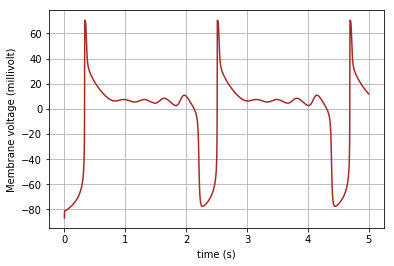

In [140]:
V_mem=y[:,0]/C_m;
plt.plot(t,V_mem*1000, 'brown')
plt.xlabel("time (s)")
plt.ylabel("Membrane voltage (millivolt)")
plt.grid()
plt.show()

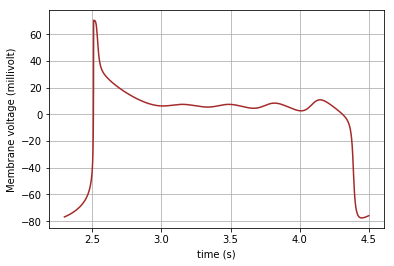

In [145]:
V_mem=y[:,0]/C_m;
plt.plot(t[2300:4500],V_mem[2300:4500]*1000, 'brown')
plt.xlabel("time (s)")
plt.ylabel("Membrane voltage (millivolt)")
plt.grid()
plt.show()

In [5]:
from sympy import SparseMatrix, lambdify, Symbol

In [6]:
def full_equations(model):
    
    #"Returns full equations of a BondGraphTools model"
    X, mapping, A, F, G = model.system_model()
    # AX + F(X) = 0
    # G(X) = 0
    AX = A*SparseMatrix(X) + F
    full_model_equations = {}
    for i in range(AX.rows):
        xi = X[i]
        eqn = xi - AX[i,0]
        full_model_equations[str(xi)] = eqn
    return full_model_equations

In [7]:
def get_ports(component):
    "Returns the ports of a component"
    return list(component.ports.keys())

In [8]:
def reaction_expressions(model,reaction):
    #"Returns the mathematical expression corresponding to a reaction within a model"
    if type(reaction) == str:
        comp = model/f"R:{reaction}"
    elif isinstance(reaction,bgt.atomic.BondGraphBase):
        comp = reaction
    port = get_ports(comp)[0]
    return port_expressions(port,model)

In [9]:
def port_expressions(port,model):
    #"Returns mathematical expressions corresponding to the effort and flow of bond at a port"
    mapping = model.system_model()[1]
    bond_index = mapping[1][port]
    full_model_equations = full_equations(model)
    return full_model_equations[f'e_{bond_index}'],full_model_equations[f'f_{bond_index}']

In [10]:
def extract_solution_values(sol,model,component,t=None):
    index = state_index(model,component)
    if t == None:
        return sol.t, np.array(sol.u)[:,index]
    else:
        return t, np.array(sol(t))[index,:]

In [11]:
def compute_fluxes(model,reaction,sol):
    #"Compute the fluxes of a reaction from the solution of a simulation"
    flux_expression = reaction_expressions(model,reaction)[1]
    states = [Symbol(x) for x in model.state_vars.keys()]
    f = lambdify(([states]),flux_expression)
    return np.array([f(x) for x in sol])

In [146]:
flux_Na=compute_fluxes(model,Re_GHK_Na,y)

In [147]:
flux_Ca=compute_fluxes(model,Re_GHK_Ca,y)

In [148]:
flux_K=compute_fluxes(model,Re_GHK_K,y)

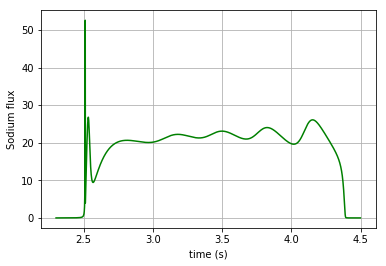

In [153]:
plt.plot(t[2300:4500],flux_Na[2300:4500], 'g')
plt.xlabel("time (s)")
plt.ylabel("Sodium flux")
plt.grid()
plt.show()

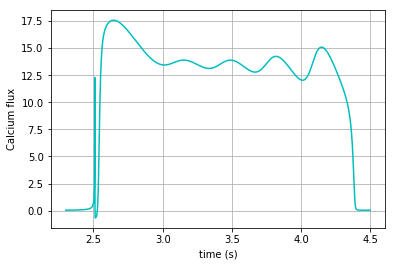

In [154]:
plt.plot(t[2300:4500],flux_Ca[2300:4500], 'c')
plt.xlabel("time (s)")
plt.ylabel("Calcium flux")
plt.grid()
plt.show()

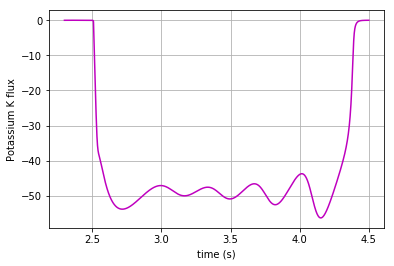

In [155]:
flux_nK=[-i for i in flux_K]
plt.plot(t[2300:4500],flux_nK[2300:4500], 'm')
plt.xlabel("time (s)")
plt.ylabel("Potassium flux")
plt.grid()
plt.show()

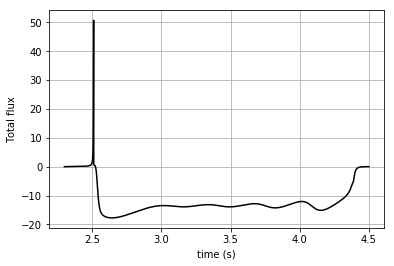

In [157]:
flux_t=[sum(i) for i in zip(flux_nK , flux_Ca , flux_Na)]
plt.plot(t[2300:4500],flux_t[2300:4500], 'k')
plt.xlabel("time (s)")
plt.ylabel("Total flux")
plt.grid()
plt.show()